# Introduction
In the last chapter we had a glimpse of Pandas. In this chapter we will learn about resampling methods and the DataFrame object, which is a powerful tool for financial data analysis.

# Fetching Data
Here we use the Quandl API to retrieve data.

In [ ]:
pip install quandl

In [ ]:
import quandl
quandl.ApiConfig.api_key = 'cF8Kaqgh9Ua-x-xF-5GC'

We will create a Series named "aapl" whose values are Apple's daily closing prices, which are of course indexed by dates:

In [ ]:
aapl_table = quandl.get('WIKI/AAPL')
aapl = aapl_table['Adj. Close']['2017']
print (aapl)

Recall that we can fetch a specific data point using series['yyyy-mm-dd']. We can also fetch the data in a specific month using series['yyyy-mm'].

In [ ]:
print (aapl['2017-3'])

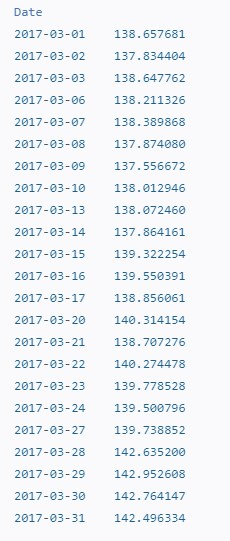

Or in several consecutive months:

In [ ]:
aapl['2017-2':'2017-4']

.head(N) and .tail(N) are methods for quickly accessing the first or last N elements.

In [ ]:
print (aapl.head())
print (aapl.tail(10))

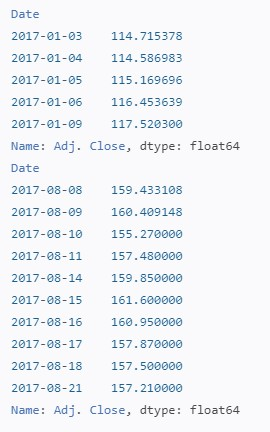

The output:

# Resampling
***series.resample(freq)*** is a class called "DatetimeIndexResampler" which groups data in a Series object into regular time intervals. The argument "freq" determines the length of each interval.

***series.resample.mean()*** is a complete statement that groups data into intervals, and then compute the mean of each interval. For example, if we want to aggregate the daily data into monthly data by mean:

In [ ]:
by_month = aapl.resample('M').mean()
print (by_month)

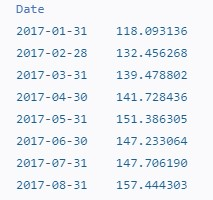

We can also aggregate the data by week:

In [ ]:
by_week = aapl.resample('W').mean()
print (by_week.head())


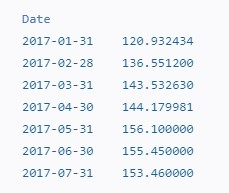

We can choose almost any frequency by using the format 'nf', where 'n' is an integer and 'f' is M for month, W for week and D for day.

In [ ]:
three_day = aapl.resample('3D').mean()
two_week  = aapl.resample('2W').mean()
two_month = aapl.resample('2M').mean()

Besides the mean() method, other methods can also be used with the resampler:

In [ ]:
std = aapl.resample('W').std()    # standard deviation
max = aapl.resample('W').max()    # maximum value
min = aapl.resample('W').min()    # minimum value

Often we want to calculate monthly returns of a stock, based on prices on the last day of each month. To fetch those prices, we use the series.resample.agg() method:

In [ ]:
last_day = aapl.resample('M').agg(lambda x: x[-1])
print (last_day)

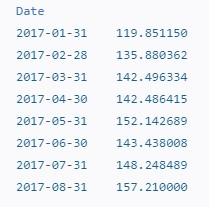

Or directly calculate the monthly rates of return using the data for the first day and the last day:

In [ ]:
monthly_return = aapl.resample('M').agg(lambda x: x[-1]/x[1] - 1)
print (monthly_return)

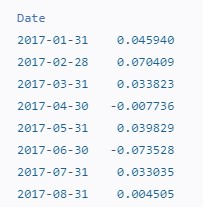

Series object also provides us some convenient methods to do some quick calculation.

In [ ]:
print (monthly_return.mean())
print (monthly_return.std())
print (monthly_return.max())

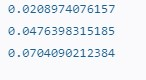

Another two methods frequently used on Series are .diff() and .pct_change(). The former calculates the difference between consecutive elements, and the latter calculates the percentage change.

In [ ]:
print (last_day.diff())
print (last_day.pct_change())

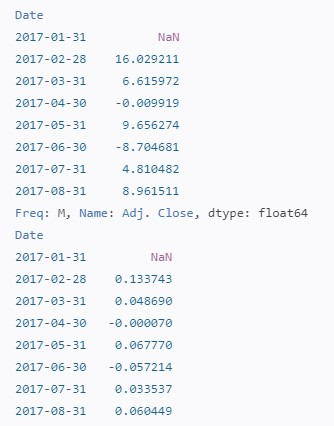

Notice that we induced a NaN value while calculating percentage changes i.e. returns.

When dealing with NaN values, we usually either removing the data point or fill it with a specific value. Here we fill it with 0:

In [ ]:
daily_return = last_day.pct_change()
print (daily_return.fillna(0))

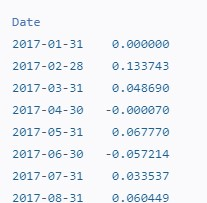

Alternatively, we can fill a NaN with the next fitted value. This is called 'backward fill', or 'bfill' in short:

In [ ]:
daily_return = last_day.pct_change()
print (daily_return.fillna(method = 'bfill'))

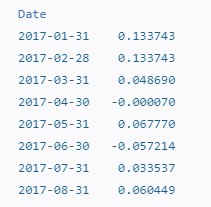

As expected, since there is a 'backward fill' method, there must be a 'forward fill' method, or 'ffill' in short. However we can't use it here because the NaN is the first value.

We can also simply remove NaN values by .dropna()

In [ ]:
daily_return = last_day.pct_change().dropna()
print (daily_return)

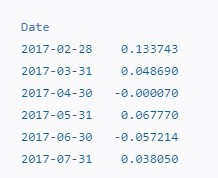

# DataFrame
The DataFrame is the most commonly used data structure in Pandas. It is essentially a table, just like an Excel spreadsheet.

More precisely, a DataFrame is a collection of Series objects, each of which may contain different data types. A DataFrame can be created from various data types: dictionary, 2-D numpy.ndarray, a Series or another DataFrame.

# Create DataFrames
The most common method of creating a DataFrame is passing a dictionary:

In [ ]:
dict = {'AAPL': [143.5,  144.09, 142.73, 144.18, 143.77],
        'GOOG': [898.7,  911.71, 906.69, 918.59, 926.99],
        'IBM':  [155.58, 153.67, 152.36, 152.94, 153.49]}
dates = pd.date_range('2017-07-03', periods = 5, freq = 'D')
df = pd.DataFrame(dict, index = dates)
print (df)

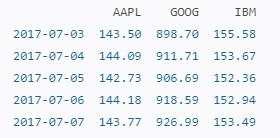

# Manipulating DataFrames
We can fetch values in a DataFrame by columns and index. Each column in a DataFrame is essentially a Pandas Series. We can fetch a column by square brackets: df['column_name']

If a column name contains no spaces, then we can also use df.column_name to fetch a column

In [ ]:
df = aapl_table
print df.Close.tail(5)
print (df['Adj. Volume'].tail(5))

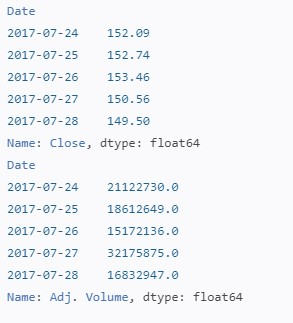

All the methods we applied to a Series index such as iloc[], loc[] and resampling methods, can also be applied to a DataFrame:

In [ ]:
aapl_2016 = df['2016']
aapl_month = aapl_2016.resample('M').agg(lambda x: x[-1])
print (aapl_month)

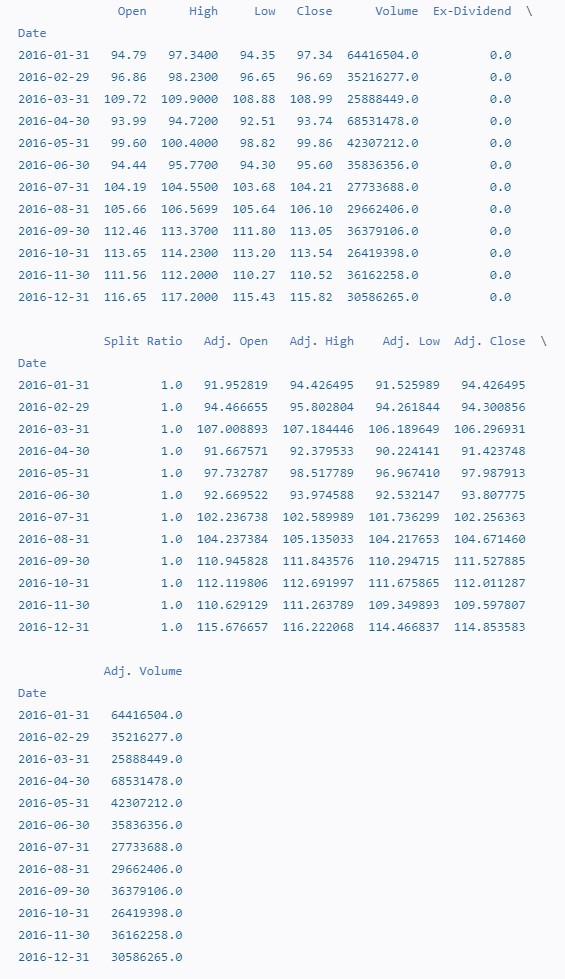

We may select certain columns of a DataFrame using their names:

In [ ]:
aapl_bar = aapl_month[['Open', 'High', 'Low', Close']]
print (aapl_bar)

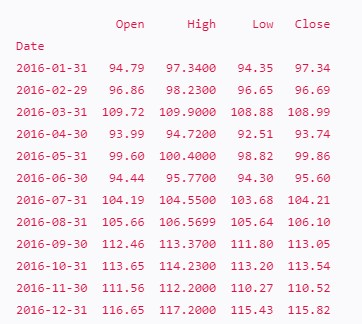

We can even specify both rows and columns using loc[]. The row indices and column names are separated by a comma:

In [ ]:
print (aapl_month.loc['2016-03':'2016-06', ['Open', 'High', 'Low', 'Close']])

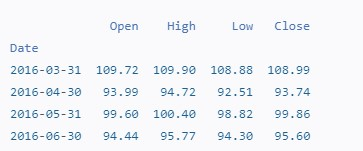

The subset methods in DataFrame is quite useful. By writing logical statements in square brackets, we can make customized subsets:

In [ ]:
above = aapl_bar[aapl_bar.Close > np.mean(aapl_bar.Close)]
print (above)

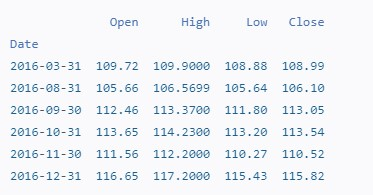

**Data Validation**

As mentioned, all methods that apply to a Series can also be applied to a DataFrame. Here we add a new column to an existing DataFrame:

In [ ]:
aapl_bar['rate_return'] = aapl_bar.Close.pct_change()
print (aapl_bar)

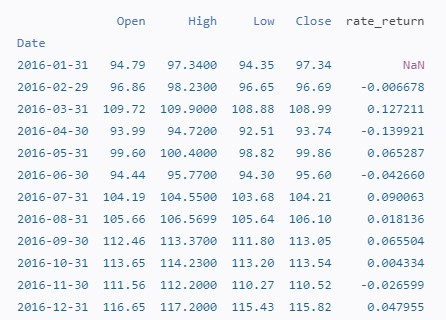

Here the calculation introduced a NaN value. If the DataFrame is large, we would not be able to observe it. isnull() provides a convenient way to check abnormal values.

In [ ]:
missing = aapl_bar.isnull()
print (missing)
print ('---------------------------------------------')
print (missing.describe())

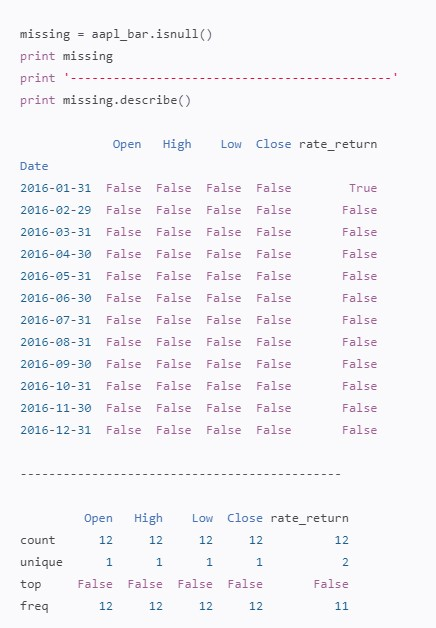

Here the calculation introduced a NaN value. If the DataFrame is large, we would not be able to observe it. isnull() provides a convenient way to check abnormal values.

In [ ]:
print (missing[missing.rate_return == True])

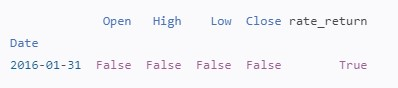

Usually when dealing with missing data, we either delete the whole row or fill it with some value. As we introduced in the Series chapter, the same method dropna() and fillna() can be applied to a DataFrame.

In [ ]:
drop = aapl_bar.dropna()
print (drop)
print ('\n--------------------------------------------------\n')
fill = aapl_bar.fillna(0)
print (fill)

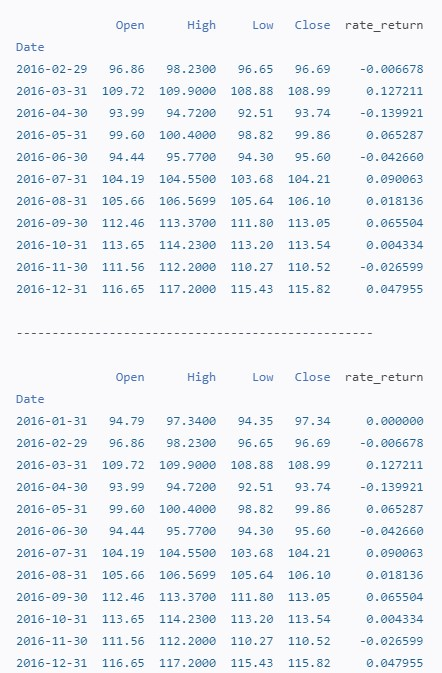

# DataFrame Concat
We have seen how to extract a Series from a dataFrame. Now we need to consider how to merge a Series or a DataFrame into another one.

In Pandas, the function concat() allows us to merge multiple Series into a DataFrame:



In [ ]:
s1 = pd.Series([143.5, 144.09, 142.73, 144.18, 143.77], name = 'AAPL')
s2 = pd.Series([898.7, 911.71, 906.69, 918.59, 926.99], name = 'GOOG')
data_frame = pd.concat([s1, s2], axis = 1)
print (data_frame)

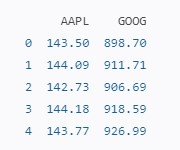

The "axis = 1" parameter will join two DataFrames by columns:

In [ ]:
log_price = np.log(aapl_bar.Close)
log_price.name = 'log_price'
print (log_price)
print ('\n--------------------------------------------\n')
concat = pd.concat([aapl_bar, log_price], axis = 1)
print (concat)

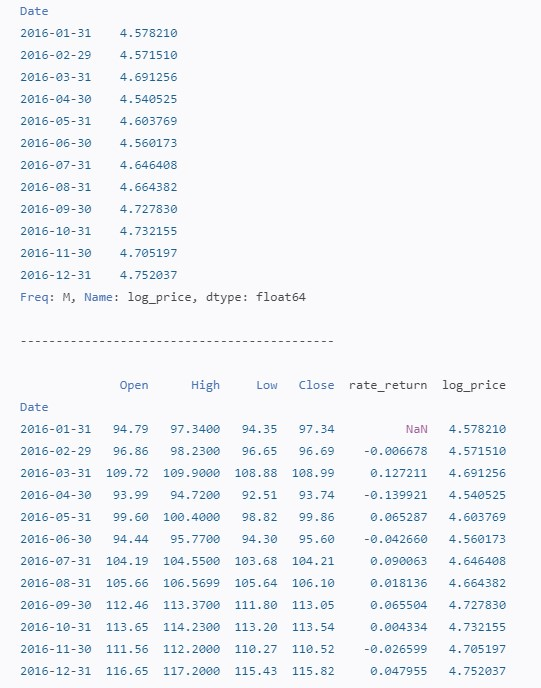

We can also join two DataFrames by rows. Consider these two DataFrames:

In [ ]:
df_volume = aapl_table.loc['2016-10':'2017-04', ['Volume', 'Split Ratio']].resample('M').agg(lambda x: x[-1])
print (df_volume)
print ('\n-------------------------------------------\n')
df_2017 = aapl_table.loc['2016-10':'2017-04', ['Open', 'High', 'Low', 'Close']].resample('M').agg(lambda x: x[-1])
print (df_2017)

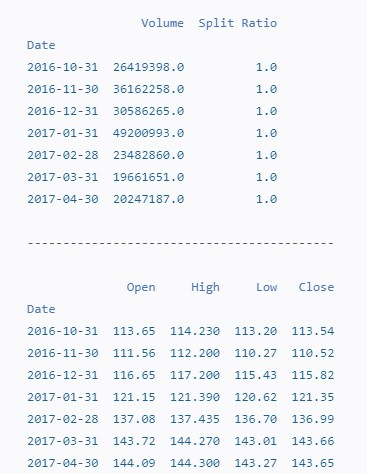

Now we merge the DataFrames with our DataFrame 'aapl_bar'

In [ ]:
concat = pd.concat([aapl_bar, df_volume], axis = 1)
print (concat)

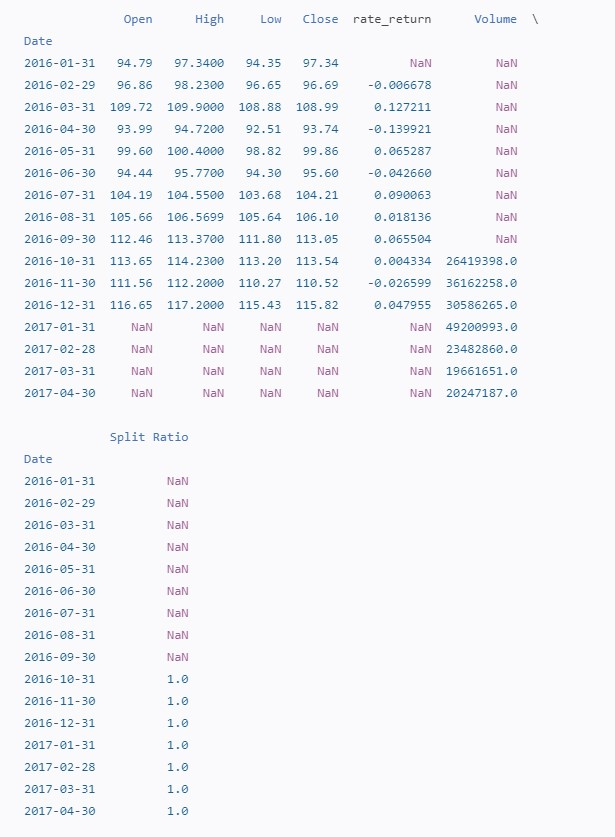

By default the DataFrame are joined with all of the data. This default options results in zero information loss. We can also merge them by intersection, this is called 'inner join':

In [ ]:
concat = pd.concat([aapl_bar, df_volume], axis = 1, join = 'inner')
print (concat)

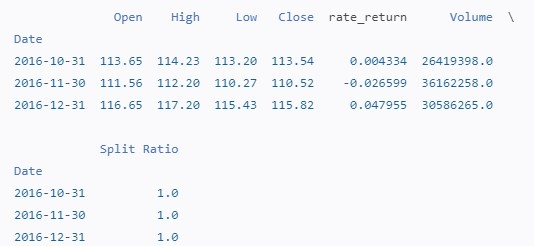

Only the intersection part was left if use 'inner join' method. Now let's try to append a DataFrame to another one:

In [ ]:
append = aapl_bar.append(df_2017)
print (append)

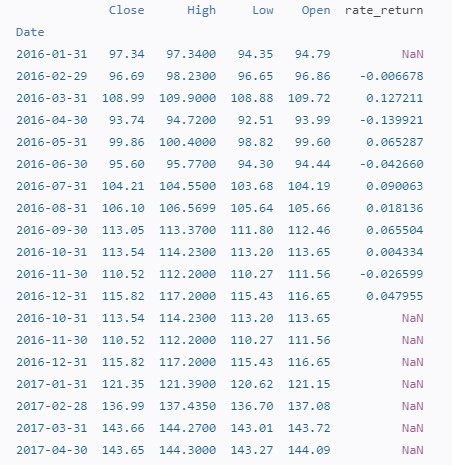

'Append' is essentially to concat two DataFrames by axis = 0, thus here is an alternative way to append:

In [ ]:
concat = pd.concat([aapl_bar, df_2017], axis = 0)
print (concat)

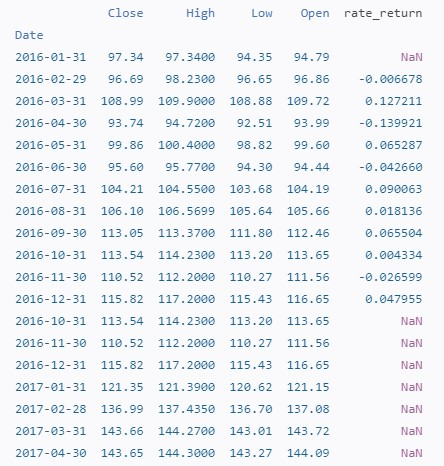

Please note that if the two DataFrame have some columns with the same column names, these columns are considered to be the same and will be merged. It's very important to have the right column names. If we change a column names here:

In [ ]:
df_2017.columns = ['Change', 'High', 'Low', 'Close']
concat = pd.concat([aapl_bar, df_2017], axis = 0)
print (concat)

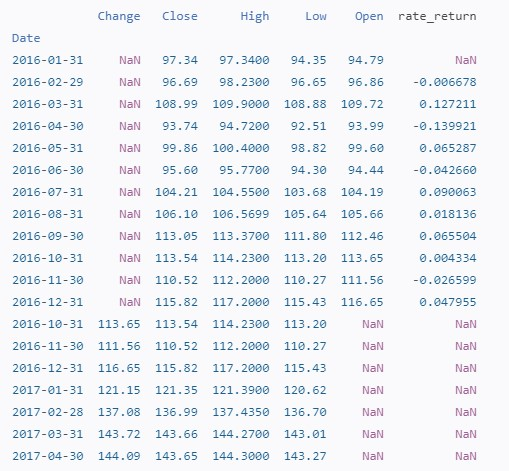

Since the column name of 'Open' has been changed, the new DataFrame has an new column named 'Change'.

# Summary
Hereby we introduced the most import part of python: resampling and DataFrame manipulation. We only introduced the most commonly used method in Financial data analysis. There are also many methods used in data mining, which are also beneficial. You can always check the Pandas official documentations for help.